## Monte Carlo method of finding Minimum

We to approximate the minimum of $ f(x, y) = x^2/2 + y^2/4$ using the monte carlo method by randomly selecting N number of (x,y) ordered pairs and test those points to find a local minimum.
The graph of $ f(x, y) = x^2/2 + y^2/4$ can be visualized as:

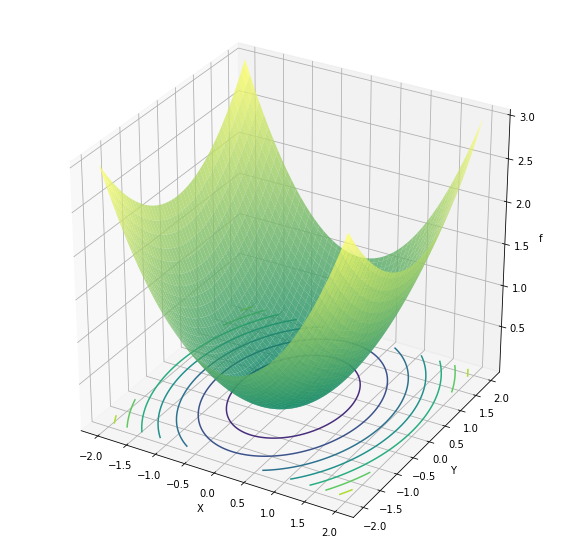

In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of y

def f(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f(x, y)
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()



Now we generate and pick our random points in a given domain of $ R^{2}$. 
Thereafter, we test to see if our random (x,y) is less than the previous random (x,y)

In [2]:
import numpy as np
#define a function to generate N random number of points in our RxR domain of (x) versus (y) from [x0,xn] 
#and [y0,yn] and test to see if it is a minimum point
def MinimumMC(N, f, x0, xn, y0, yn):
    
    xrange = xn - x0  # Range of x points
    yrange = yn - y0  # Range of y points
    # define an initial random point as our xmin and ymin
    min_x = x0 + np.random.random() * xrange
    min_y = y0 + np.random.random() * yrange
    
    for i in range(N):
        # generate new random pair of coordinates
        x = x0 + np.random.random() * xrange
        y = y0 + np.random.random() * yrange      
        if f(x, y) < f(min_x, min_y):
            min_x, min_y = x, y
    return min_x, min_y, f(min_x, min_y)

We know that the true minimum for the function is at (0,0) and is f(0,0)=0.
Therefore we can see how close we get to 0 as we increase the number of random test points

In [3]:
#We can test for a trend in accuracy as we differ the N number of points we have:
A=[10,100,1000,10000,100000,1000000,10000000]
for i in A:
    xmin,ymin,fmin= MinimumMC(i, f, -3, 3, -2, 2)
    print("Number of points:",i)
    print("Minimum found at (x,y)=(",xmin,",",ymin,")")
    print("Minimum value at (x,y) is: f(x,y)=",fmin)
    print("")

Number of points: 10
Minimum found at (x,y)=( -0.23066499689555364 , -1.3589938720794934 )
Minimum value at (x,y) is: f(x,y)= 0.48831925648381647

Number of points: 100
Minimum found at (x,y)=( -0.07217451784523288 , -0.014583346714111656 )
Minimum value at (x,y) is: f(x,y)= 0.0026577490134419173

Number of points: 1000
Minimum found at (x,y)=( 0.0407614202770632 , 0.000349722040514866 )
Minimum value at (x,y) is: f(x,y)= 0.0008307772678780949

Number of points: 10000
Minimum found at (x,y)=( 0.006786514686603962 , 0.02057171479778397 )
Minimum value at (x,y) is: f(x,y)= 0.00012882725322608662

Number of points: 100000
Minimum found at (x,y)=( 0.002283374518603498 , -0.0011209853867772956 )
Minimum value at (x,y) is: f(x,y)= 2.9210516554459395e-06

Number of points: 1000000
Minimum found at (x,y)=( -0.000620774234653787 , -0.0006981897342162036 )
Minimum value at (x,y) is: f(x,y)= 3.1454755144622075e-07

Number of points: 10000000
Minimum found at (x,y)=( 0.0006856127021057645 , 0.0001

## Gradient Decent Model


From the above data, it is quite clear that the algorithm is not very efficient and highly sensitive to the choice of
step size $\gamma$. With certain assumptions on the function $F$ and particular choices of $\gamma$  (e.g., chosen either via a line search that satisfies the Wolfe conditions or the Barzilai-Borwein method shown as following):

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

For the 1d case, the equation returns to:

$$ \gamma_n = \frac{(x_n-x_{n-1})} {\nabla f(x_n) - \nabla f(x_{n-1}) }  $$

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$




In [4]:
#we define the gradient of a f(x,y) function as the partials w/ respect to x & y
import numpy as np
def Grad(f,coordinate, d=0.00001):
    x = coordinate[0]
    y = coordinate[1]
    dfx = (f(x+d, y) - f(x, y))/d
    dfy = (f(x, y+d) - f(x, y))/d
    return np.array([dfx, dfy])

Now we the algorithm to calculate the gamma every step and compare to find a local minima:

In [5]:
#all (n) terms are related to 'now' and all (n-1) terms are related to 'pre'
#"dfnow" means the gradient of a point in array format related to the (Xn)

def GradDecModel(f,x0y0, N=1000):
    
    xynow = x0y0
    xypre = None
    converged = False
    xy_hist = [] # store the coordinates at each step
    xy_hist.append(xynow)
    
    for i in range(N):
        dfnow = Grad(f, xynow)
        
        if xypre is None:
            gamma=.001  #we initially pick a small step to later have the algorithm assess the next step size
        else:
            dfpre = Grad(f, xypre)
            dfdif = dfnow - dfpre # difference in gradients
            #gamma calculation
            gamma = np.dot(xynow - xypre, dfdif) / (np.linalg.norm(dfdif))**2
        
        xynext = xynow - gamma*dfnow
       
    
        if f(xynext[0], xynext[1]) > f(xynow[0], xynow[1]):
            converged = True
            break
        else:
            xypre = xynow
            xynow = xynext
            xy_hist.append(xynow)

    return converged, np.array(xy_hist), f(xynow[0], xynow[1])

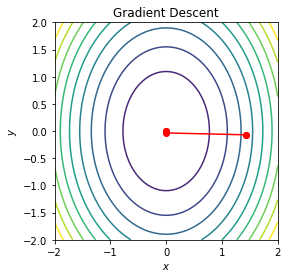

Minimum of 1.86034347666305e-11 found in 6 steps.


In [6]:
xmin, xmax = -2, 2                          # range of x
ymin, ymax = -2, 2                          # range of y

nx = np.linspace(xmin,xmax,100)
ny = np.linspace(ymin,ymax,100)
x, y = np.meshgrid(nx, ny)

#define function
z = f(x, y)

#assign a random startpoint 
def x0y0random(xmin, xmax, ymin, ymax):
    x0 = xmin + np.random.random()*(xmax-xmin)
    y0 = ymin + np.random.random()*(ymax-ymin)
    return [x0, y0]
x0y0 = x0y0random(xmin, xmax, ymin, ymax)

#Run our Gradient Decent Model method of finding the minimum:
converged, xy_historyarray, fmin = GradDecModel(f,x0y0, N=1000)




fig = plt.figure(figsize=[4,4])
plt.title("Gradient Descent")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-2,2)
plt.ylim(-2,2)
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x, y, z, levels=levels)
plt.plot(xy_historyarray[:,0], xy_historyarray[:,1], 'ro-')
plt.show()
print("Minimum of", fmin, "found in", len(xy_historyarray), "steps.")



# HWK 16.6 
### Question #1: 
We have to find the minimum of $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$ using a method other than the Monte Carlo Method therefore we define the function and run it in our "GradDecModel" Algorithm


### Graphing
We first graph the function 

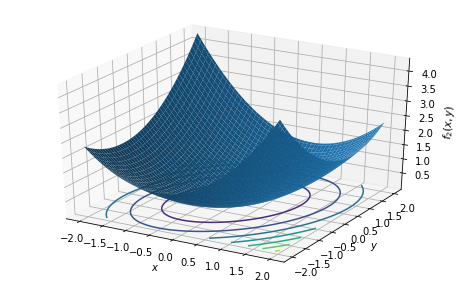

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
xmin, xmax = -2, 2 
ymin, ymax = -2, 2 

def f2(x, y):
    return 1/2*x**2 + 1/3*y**2 - x*y/4

nx = np.linspace(xmin,xmax,100)
ny = np.linspace(ymin,ymax,100)
x,y = np.meshgrid(nx,ny)
z = f2(x, y)


fig = plt.figure(figsize=[8,5])
ax = fig.gca(projection='3d', aspect="auto")
ax.plot_surface(x,y,z, alpha=1.0)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_2(x,y)$')
plt.show()

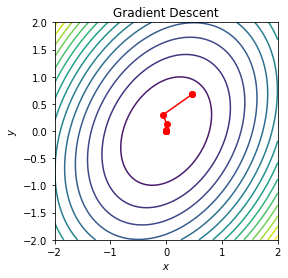

Minimum of 1.8031711068301583e-11 found in 10 steps.


In [21]:
#assign a random startpoint 
def x0y0random(xmin, xmax, ymin, ymax):
    x0 = xmin + np.random.random()*(xmax-xmin)
    y0 = ymin + np.random.random()*(ymax-ymin)
    return [x0, y0]
x0y0 = x0y0random(xmin, xmax, ymin, ymax)

#Run our Gradient Decent Model method of finding the minimum:
converged, xy_historyarray, fmin = GradDecModel(f,x0y0, N=1000)

#Graph our results for the minimum
fig = plt.figure(figsize=[4,4])
plt.title("Gradient Descent")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-2,2)
plt.ylim(-2,2)
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x, y, z, levels=levels)
plt.plot(xy_historyarray[:,0], xy_historyarray[:,1], 'ro-')
plt.show()
print("Minimum of", fmin, "found in", len(xy_historyarray), "steps.")






## Now we compare with SciPy results
Using the code and method of evaluation in class, we use these algorithms.
We first must redefine our F2 function so it fits the format of SciPy minimizing function

In [24]:
def f2(x):
    return 1/2*x[0]**2 + 1/3*x[1]**2 - x[0]*x[1]/4

In [33]:
from scipy.optimize import minimize
[x0, y0] = x0y0random(xmin, xmax, ymin, ymax)

res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 70


In [26]:
res = minimize(f2, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 6


In [27]:
res = minimize(f2, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 20
         Gradient evaluations: 5


In [28]:
res = minimize(f2, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 64


### We see that the value of our written Algorithm "GradDecentModel" is very close to the library result from the SciPy Library